Top 100 Bestselling Book Reviews


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import iqr

In [39]:
top100 = pd.read_csv("Top-100 Trending Books.csv", index_col = 0).dropna()
reviews = pd.read_csv("customer reviews.csv")

In [40]:
top100.head()

,book title,book price,rating,author,year of publication,genre,url
Rank,,,,,,,
1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...


In [41]:
reviews.head(300)

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
...,...,...,...,...,...,...,...,...,...,...
295,295,The Very Hungry Caterpillar,Cute,Gina,5,"This book has been around for decades, got it ...",True,23-10-2023,"Reviewed in the United States October 23, 2023",399226907
296,296,The Very Hungry Caterpillar,Cute classic,JM,4,My little one doesn’t enjoy this book as much ...,True,03-11-2023,"Reviewed in the United States November 3, 2023",399226907
297,297,The Very Hungry Caterpillar,Hungry caterpillar,Loved this book as a child and bought the book...,5,Loved this book as a kid and It means a lot to...,True,18-10-2023,"Reviewed in the United States October 18, 2023",399226907
298,298,The Very Hungry Caterpillar,One of The best gifts for new baby.,Erik B. Anderson,5,CLASSIC WONDERFULLY BOOK.,True,29-10-2023,"Reviewed in the United States October 29, 2023",399226907


### Merging both tabels base on book title and book name id using outer join and saving in top100_reviews variable

In [42]:
top100_reviews = top100.merge(reviews, left_on = "book title", right_on = "book name")

In [43]:
top100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 1 to 100
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book title           97 non-null     object 
 1   book price           97 non-null     float64
 2   rating               97 non-null     float64
 3   author               97 non-null     object 
 4   year of publication  97 non-null     int64  
 5   genre                97 non-null     object 
 6   url                  97 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ KB


In [44]:
top100_reviews.head()

,book title,book price,rating,author,year of publication,genre,url,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048


### It is necessary to check whether our data set contains many reviews based on not verified users

In [45]:
top100_reviews_by_verification = top100_reviews.groupby(by = "is_verified")

In [47]:
top100_reviews.query('is_verified == False')

,book title,book price,rating,author,year of publication,genre,url,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
467,Hidden Potential: The Science of Achieving Gre...,21.0,4.4,Adam M. Grant,2023,"Nonfiction, Self Help, Psychology, Business, L...",amazon.com/Hidden-Potential-Science-Achieving-...,447,Hidden Potential: The Science of Achieving Gre...,Enthusiastically presented - carefully structured,Dave Nat,4,You can tell Adam Grant takes his work serious...,False,25-10-2023,"Reviewed in the United States October 25, 2023",593653149
468,Hidden Potential: The Science of Achieving Gre...,21.0,4.4,Adam M. Grant,2023,"Nonfiction, Self Help, Psychology, Business, L...",amazon.com/Hidden-Potential-Science-Achieving-...,448,Hidden Potential: The Science of Achieving Gre...,A lot of our school system is set up one way w...,Caroline L.,4,Adam Grant goes into why we should be celebrat...,False,26-10-2023,"Reviewed in the United States October 26, 2023",593653149
469,Hidden Potential: The Science of Achieving Gre...,21.0,4.4,Adam M. Grant,2023,"Nonfiction, Self Help, Psychology, Business, L...",amazon.com/Hidden-Potential-Science-Achieving-...,449,Hidden Potential: The Science of Achieving Gre...,Embrace the Power of Being a Sponge,Noreen Wise,5,"Adam Grant is an amazing storyteller, and ""Hid...",False,30-10-2023,"Reviewed in the United States October 30, 2023",593653149


### As we can see there are only 3 reviews for not verified users - the amount of data for False option is too small to analyze the data dividing into verified and not verified users

### The coefficient between book price and and rating is about 0.29 - there is no significant correlation
#### Base on colors on the plot we may think that books in top 100 bestselling which were published after 2010  year might have more significant correlation between price and rating - lets check that!


In [61]:
np.corrcoef(x = top100["book price"], y = top100["rating"])

array([[ 1.        , -0.28581606],
       [-0.28581606,  1.        ]])

### The coefficient between book price and rating for books that were published after 2010 year is even lower! - 0.25 - there is no significant correlation

In [56]:
np.corrcoef(x = top100.where(top100["year of publication"] > 2010).dropna()["book price"],
            y = top100.where(top100["year of publication"] > 2010).dropna()["rating"])

array([[ 1.      , -0.247524],
       [-0.247524,  1.      ]])

### To compare in any way both ratings - the official one and reviewer rating lets plot boxplot and histogram

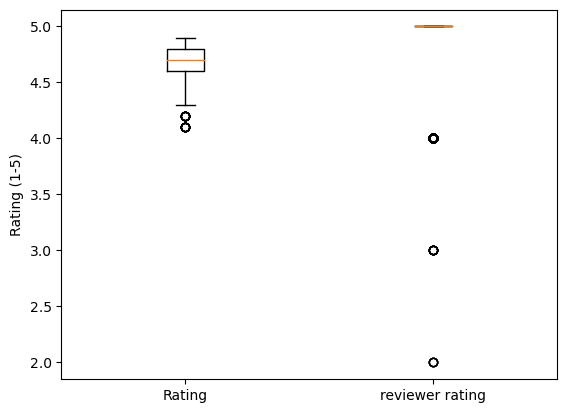

In [106]:
fig, ax = plt.subplots()
ax.boxplot([top100_reviews["rating"],top100_reviews["reviewer rating"]])
ax.set_xticklabels(["Rating", "reviewer rating"])
ax.set_ylabel("Rating (1-5)")

plt.show()

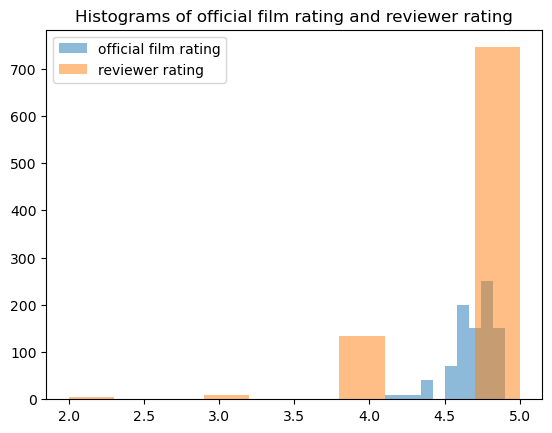

In [102]:
plt.hist(top100_reviews["rating"], alpha = 0.5)
plt.hist(top100_reviews["reviewer rating"], alpha = 0.5)
plt.title("Histograms of official film rating and reviewer rating")
plt.legend(["official film rating","reviewer rating"])
plt.show()

### As we can see the boxplot and distribution of reviewer rating is slightly strange
#### The cause might be that the scale of official film rating was more continuous than reviewer rating as for reviewer ratings we observe only integer numbers

### THE CORRELATION BETWEEN THE LENGTH OF THE REVIEW TITLE AND THE REVIEWER RATING

In [6]:
reviews['Review title length'] = reviews['review title'].apply(lambda x: len(str(x).split()))

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


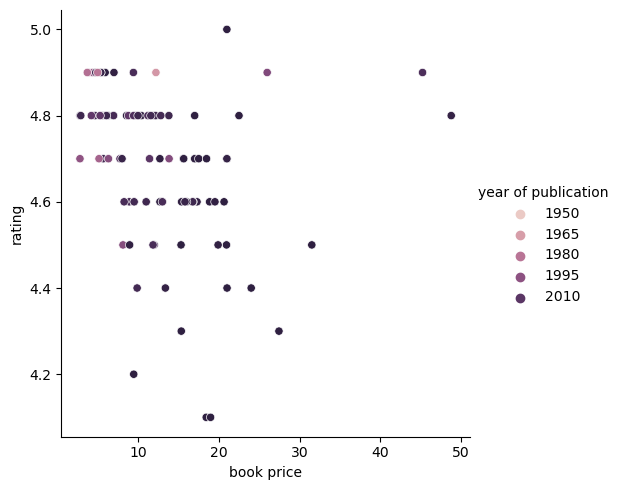

In [48]:
sns.relplot(x = "book price", y = "rating", data = top100, kind = "scatter", hue = "year of publication")

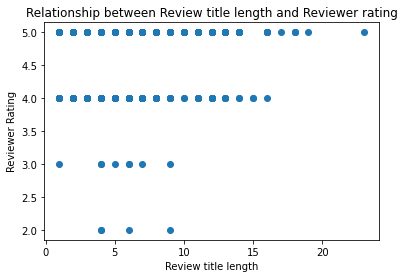

In [8]:
plt.scatter(reviews['Review title length'], reviews['reviewer rating'])
plt.title('Relationship between Review title length and Reviewer rating')
plt.xlabel('Review title length')
plt.ylabel('Reviewer Rating')
plt.show()


In [10]:
correlation = reviews['Review title length'].corr(reviews['reviewer rating'])
print(f"Correlation between the length of review title and reviewer rating: {correlation}")


Correlation between the length of review title and reviewer rating: -0.11946857301813008


The correlation between the length of the revie title and reviewer rating is negative, which suggest the longer the title, the worse the rating. However, the relation is not strong, estimated at the level of roughly -0.12.

### Review description length vs review score: check for correlation and visualization.

In [ ]:
# getting series of description length values
rev_desc = top100_reviews['review description']
rev_desc = pd.Series(rev_desc)
rev_desc_length = rev_desc.str.len()

top100_reviews['review description length'] = rev_desc_length
review_score = top100_reviews['reviewer rating']

#### Visualisation and correlation check
There is no significant correlation between length of the review (based od string length) and the review score. This could also be seen on the plot when considering the whole range of reviews.

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


array([[ 1.        , -0.14862296],
       [-0.14862296,  1.        ]])

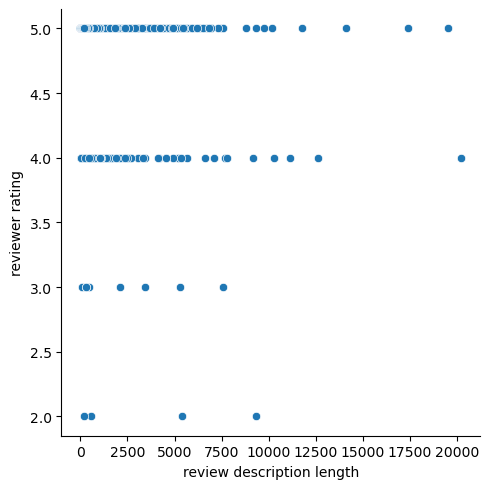

In [ ]:
sns.relplot(x = "review description length", y = "reviewer rating", data = top100_reviews, kind = "scatter")
np.corrcoef(x = top100_reviews['review description length'], y = top100_reviews['reviewer rating'])

#### Analysis of correlation without text length outliers
Outliers will be dropped using IQR rule.

In [ ]:
rev_desc_length.describe()

count      890.000000
mean      1143.767416
std       2136.416001
min          3.000000
25%        130.250000
50%        362.000000
75%       1029.500000
max      20208.000000
Name: review description, dtype: float64

In [ ]:
Q3 = np.quantile(rev_desc_length, 0.75)
print('Mean:', '%.2f' % rev_desc_length.mean(), 'Median:', rev_desc_length.median())
Q1 = np.quantile(rev_desc_length, 0.25)
IQR = Q3 - Q1
print('Q1:', Q1, 'Q3:', Q3, 'IQR:', IQR)
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
print('Lower range:', lower_range, 'Upper range:', upper_range)

# considering the fact that review cannot have less than 0 words, 0 is lower level
lower_range = 0
print('After adjustment:\n','Lower range:', lower_range, 'Upper range:', upper_range)

Mean: 1143.77 Median: 362.0
Q1: 130.25 Q3: 1029.5 IQR: 899.25
Lower range: -1218.625 Upper range: 2378.375
After adjustment:
 Lower range: 0 Upper range: 2378.375


In [ ]:
#rev_desc_length.where(rev_desc_length < upper_range).dropna()
#rev_desc_length.loc[lambda x : (x < upper_range)]

s1 = rev_desc_length < upper_range
s2 = rev_desc_length > 0

s1 = list(s1)
s2 = list(s2)

s1 = np.array(s1, dtype = bool)
s2 = np.array(s2, dtype = bool)

# Boolean vector to select indexes that match the conditions
final_list = list(np.logical_and(s1, s2))


d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


array([[ 1.        , -0.12657871],
       [-0.12657871,  1.        ]])

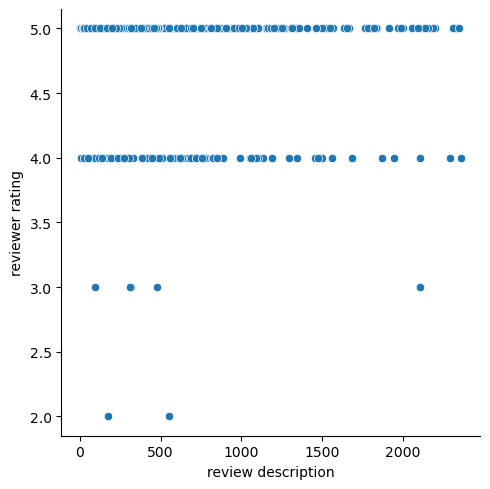

In [ ]:
sns.relplot(x = rev_desc_length[final_list], y = review_score[final_list] , kind = "scatter")
np.corrcoef(x = rev_desc_length[final_list], y = review_score[final_list])

There is no correlation even after dropping the outliers.

### Distribution of book genres in the data set.

In [ ]:
genres = top100_reviews['genre']
genres = list(genres)

splitted_genres = []
for x in genres:
    splitted_genres.append(x.split(', ')[:])

print('Length of splitted list assigning genres to each title:', len(splitted_genres))

Length of splitted list assigning genres to each title: 890


In [ ]:
flat_list = []
for sublist in splitted_genres:
    for item in sublist:
        flat_list.append(item)

set_of_genres = set(flat_list)

In [ ]:

list_of_genres = list(set_of_genres)
list_of_genres.sort()

genre_df = pd.DataFrame(list_of_genres, columns=['Unique Genres List'])

In [ ]:
top100_reviews = top100_reviews.drop_duplicates(subset='book name')

genres_based_on_titles = top100_reviews['genre']
genres_based_on_titles = list(genres_based_on_titles)

splitted_genres_by_titles = []
for x in genres_based_on_titles:
    splitted_genres_by_titles.append(x.split(', ')[:])

In [ ]:
flat_list_by_title = []
for sublist in splitted_genres_by_titles:
    for item in sublist:
        flat_list_by_title.append(item)

In [ ]:
from collections import Counter

count_help = Counter(flat_list_by_title)
list_of_appearances = [count_help.get(v) for v in list_of_genres]

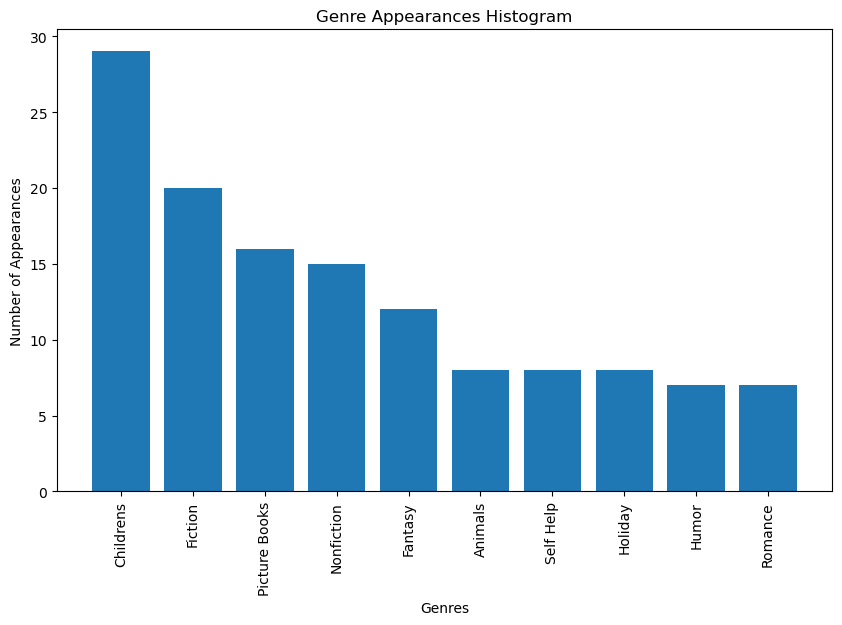

In [ ]:
genre_df['appearances'] = list_of_appearances
genre_df = genre_df.sort_values(by='appearances', ascending=False)
top10_genres = genre_df.head(10)

plt.figure(figsize=(10,6))
plt.bar(top10_genres['Unique Genres List'], top10_genres['appearances'])
plt.xlabel('Genres')
plt.ylabel('Number of Appearances')
plt.title('Genre Appearances Histogram')
plt.xticks(rotation=90)
plt.show()

The histogram shows top 10 most popular book genres on the list. The genres themselve overlap, as one book could be assigned to multiple genres. For example one book could be considered as a Fiction and Childrens book.